In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=10,n_features=3)

In [4]:
X

array([[-0.70038308, -0.17856239,  0.78955092],
       [-1.32726054, -1.5362794 , -1.52140062],
       [ 0.4593826 ,  0.27431389, -1.44029508],
       [-0.47765804,  1.55210898,  0.59572535],
       [-2.34453284,  0.78826805,  1.23951882],
       [-0.24388401, -0.56895467, -0.03824983],
       [ 0.31706786,  0.24491833, -0.84765924],
       [ 0.10826679, -0.9796422 , -0.56944818],
       [-2.25623418, -2.87921966, -2.24986533],
       [-0.64621544,  1.68141407, -1.15942732]])

In [5]:
df = pd.DataFrame(X)
df['y_true'] = y
df

,0,1,2,y_true
0,-0.700383,-0.178562,0.789551,-28.460334
1,-1.327261,-1.536279,-1.521401,-159.692677
2,0.459383,0.274314,-1.440295,-1.490766
3,-0.477658,1.552109,0.595725,20.992684
4,-2.344533,0.788268,1.239519,-99.273743
5,-0.243884,-0.568955,-0.038250,-29.779975
6,0.317068,0.244918,-0.847659,4.044105
7,0.108267,-0.979642,-0.569448,-30.572894
8,-2.256234,-2.879220,-2.249865,-269.004592
9,-0.646215,1.681414,-1.159427,-32.066971


In [6]:
df['y_pred_0'] = df['y_true'].mean() #для начала выбираем начальное случайное значение в нашем случае возьмём сдеднее по y_true

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(df['y_true'], df['y_pred_0'])


68.07589246488412

In [8]:
df['residual_0'] = df['y_true'] - df['y_pred_0'] #остатки/ошибки
df

,0,1,2,y_true,y_pred_0,residual_0
0,-0.700383,-0.178562,0.789551,-28.460334,-62.530516,34.070182
1,-1.327261,-1.536279,-1.521401,-159.692677,-62.530516,-97.162161
2,0.459383,0.274314,-1.440295,-1.490766,-62.530516,61.039750
3,-0.477658,1.552109,0.595725,20.992684,-62.530516,83.523200
4,-2.344533,0.788268,1.239519,-99.273743,-62.530516,-36.743226
5,-0.243884,-0.568955,-0.038250,-29.779975,-62.530516,32.750541
6,0.317068,0.244918,-0.847659,4.044105,-62.530516,66.574621
7,0.108267,-0.979642,-0.569448,-30.572894,-62.530516,31.957622
8,-2.256234,-2.879220,-2.249865,-269.004592,-62.530516,-206.474075
9,-0.646215,1.681414,-1.159427,-32.066971,-62.530516,30.463546


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[[0,1,2]],df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [10]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [11]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-0.700383,-0.178562,0.789551,-28.460334,-62.530516,34.070182,37.954529
1,-1.327261,-1.536279,-1.521401,-159.692677,-62.530516,-97.162161,-151.818118
2,0.459383,0.274314,-1.440295,-1.490766,-62.530516,61.039750,37.954529
3,-0.477658,1.552109,0.595725,20.992684,-62.530516,83.523200,37.954529
4,-2.344533,0.788268,1.239519,-99.273743,-62.530516,-36.743226,37.954529
5,-0.243884,-0.568955,-0.038250,-29.779975,-62.530516,32.750541,37.954529
6,0.317068,0.244918,-0.847659,4.044105,-62.530516,66.574621,37.954529
7,0.108267,-0.979642,-0.569448,-30.572894,-62.530516,31.957622,37.954529
8,-2.256234,-2.879220,-2.249865,-269.004592,-62.530516,-206.474075,-151.818118
9,-0.646215,1.681414,-1.159427,-32.066971,-62.530516,30.463546,37.954529


[Text(0.5, 0.75, 'x[2] <= -1.481\nsquared_error = 7273.894\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 2987.274\nsamples = 2\nvalue = -151.818'),
 Text(0.75, 0.25, 'squared_error = 1142.818\nsamples = 8\nvalue = 37.955')]

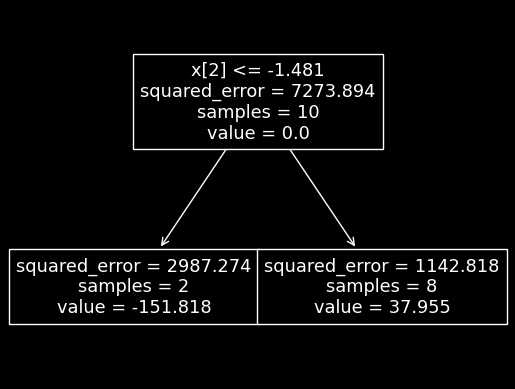

In [12]:
plot_tree(tree_1)

In [13]:
nu = 0.1
df['y_pred_1'] = df['y_pred_0'] + nu*df['tree_pred_1']
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-0.700383,-0.178562,0.789551,-28.460334,-62.530516,34.070182,37.954529,-58.735063
1,-1.327261,-1.536279,-1.521401,-159.692677,-62.530516,-97.162161,-151.818118,-77.712328
2,0.459383,0.274314,-1.440295,-1.490766,-62.530516,61.039750,37.954529,-58.735063
3,-0.477658,1.552109,0.595725,20.992684,-62.530516,83.523200,37.954529,-58.735063
4,-2.344533,0.788268,1.239519,-99.273743,-62.530516,-36.743226,37.954529,-58.735063
5,-0.243884,-0.568955,-0.038250,-29.779975,-62.530516,32.750541,37.954529,-58.735063
6,0.317068,0.244918,-0.847659,4.044105,-62.530516,66.574621,37.954529,-58.735063
7,0.108267,-0.979642,-0.569448,-30.572894,-62.530516,31.957622,37.954529,-58.735063
8,-2.256234,-2.879220,-2.249865,-269.004592,-62.530516,-206.474075,-151.818118,-77.712328
9,-0.646215,1.681414,-1.159427,-32.066971,-62.530516,30.463546,37.954529,-58.735063


In [14]:
mean_absolute_error(df['y_true'], df['y_pred_1']) #ошибка стала меньше

62.76225833564261

In [15]:
df['residual_1'] = df['y_true'] - df['y_pred_1']
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-0.700383,-0.178562,0.789551,-28.460334,-62.530516,34.070182,37.954529,-58.735063,30.274729
1,-1.327261,-1.536279,-1.521401,-159.692677,-62.530516,-97.162161,-151.818118,-77.712328,-81.980349
2,0.459383,0.274314,-1.440295,-1.490766,-62.530516,61.039750,37.954529,-58.735063,57.244297
3,-0.477658,1.552109,0.595725,20.992684,-62.530516,83.523200,37.954529,-58.735063,79.727747
4,-2.344533,0.788268,1.239519,-99.273743,-62.530516,-36.743226,37.954529,-58.735063,-40.538679
5,-0.243884,-0.568955,-0.038250,-29.779975,-62.530516,32.750541,37.954529,-58.735063,28.955088
6,0.317068,0.244918,-0.847659,4.044105,-62.530516,66.574621,37.954529,-58.735063,62.779168
7,0.108267,-0.979642,-0.569448,-30.572894,-62.530516,31.957622,37.954529,-58.735063,28.162169
8,-2.256234,-2.879220,-2.249865,-269.004592,-62.530516,-206.474075,-151.818118,-77.712328,-191.292264
9,-0.646215,1.681414,-1.159427,-32.066971,-62.530516,30.463546,37.954529,-58.735063,26.668093


In [17]:
tree_2 = DecisionTreeRegressor(max_depth= 1)

In [19]:
tree_2.fit(df[[0,1,2]],df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [21]:
df['y_pred_2'] = df['y_pred_1']+ nu*tree_2.predict(df[[0,1,2]])
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,-0.700383,-0.178562,0.789551,-28.460334,-62.530516,34.070182,37.954529,-58.735063,30.274729,-54.252045
1,-1.327261,-1.536279,-1.521401,-159.692677,-62.530516,-97.162161,-151.818118,-77.712328,-81.980349,-88.172705
2,0.459383,0.274314,-1.440295,-1.490766,-62.530516,61.039750,37.954529,-58.735063,57.244297,-54.252045
3,-0.477658,1.552109,0.595725,20.992684,-62.530516,83.523200,37.954529,-58.735063,79.727747,-54.252045
4,-2.344533,0.788268,1.239519,-99.273743,-62.530516,-36.743226,37.954529,-58.735063,-40.538679,-69.195440
5,-0.243884,-0.568955,-0.038250,-29.779975,-62.530516,32.750541,37.954529,-58.735063,28.955088,-54.252045
6,0.317068,0.244918,-0.847659,4.044105,-62.530516,66.574621,37.954529,-58.735063,62.779168,-54.252045
7,0.108267,-0.979642,-0.569448,-30.572894,-62.530516,31.957622,37.954529,-58.735063,28.162169,-54.252045
8,-2.256234,-2.879220,-2.249865,-269.004592,-62.530516,-206.474075,-151.818118,-77.712328,-191.292264,-88.172705
9,-0.646215,1.681414,-1.159427,-32.066971,-62.530516,30.463546,37.954529,-58.735063,26.668093,-54.252045


In [22]:
mean_absolute_error(df['y_true'], df['y_pred_2'])

56.48603250207835

In [24]:
df = df[[0,1,2,'y_true']].copy() #сделала изначальный датасет чтобы сделать цикл
df

,0,1,2,y_true
0,-0.700383,-0.178562,0.789551,-28.460334
1,-1.327261,-1.536279,-1.521401,-159.692677
2,0.459383,0.274314,-1.440295,-1.490766
3,-0.477658,1.552109,0.595725,20.992684
4,-2.344533,0.788268,1.239519,-99.273743
5,-0.243884,-0.568955,-0.038250,-29.779975
6,0.317068,0.244918,-0.847659,4.044105
7,0.108267,-0.979642,-0.569448,-30.572894
8,-2.256234,-2.879220,-2.249865,-269.004592
9,-0.646215,1.681414,-1.159427,-32.066971


In [28]:
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
    df['residual'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0,1,2]],df['residual'])
    df['y_pred'] += nu * tree.predict(df[[0,1,2]])
    trees.append(tree)
    print(mean_absolute_error(df['y_true'], df['y_pred']))

62.76225833564261
56.48603250207835
52.06987495938557
46.86288746344702
44.381216637160165
40.95858286862843
36.86272458176559
34.88752681303491
33.109848821177295
29.798863939059572


In [30]:
test = df[[0,1,2]].copy()

In [31]:
test['y_pred'] = df['y_true'].mean()
for tree in trees:
    test['y_pred'] += nu * tree.predict(df[[0,1,2]])

In [32]:
test

,0,1,2,y_pred
0,-0.700383,-0.178562,0.789551,-35.189782
1,-1.327261,-1.536279,-1.521401,-127.139055
2,0.459383,0.274314,-1.440295,-35.189782
3,-0.477658,1.552109,0.595725,-35.189782
4,-2.344533,0.788268,1.239519,-80.166107
5,-0.243884,-0.568955,-0.038250,-35.189782
6,0.317068,0.244918,-0.847659,-35.189782
7,0.108267,-0.979642,-0.569448,-35.189782
8,-2.256234,-2.879220,-2.249865,-171.671530
9,-0.646215,1.681414,-1.159427,-35.189782
